In [2]:
#1st step: Importing libraries to build.
#ETL libraries, basics...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#Preprocessing, pipelines (sickit-learn).
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
#Metrics to measure model efficacy.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
#2nd step: setting DF, data, initial variables.
df = pd.read_csv(r"C:\Users\Ricky\Documents\coding\codecademy\codecademy-MLE-project\datos\data\Housing.csv")
df.head()

X = df.drop('price', axis=1)
y = df['price']

X.dtypes
X,y

(     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0    7420         4          2        3      yes        no       no   
 1    8960         4          4        4      yes        no       no   
 2    9960         3          2        2      yes        no      yes   
 3    7500         4          2        2      yes        no      yes   
 4    7420         4          1        2      yes       yes      yes   
 ..    ...       ...        ...      ...      ...       ...      ...   
 540  3000         2          1        1      yes        no      yes   
 541  2400         3          1        1       no        no       no   
 542  3620         2          1        1      yes        no       no   
 543  2910         3          1        1       no        no       no   
 544  3850         3          1        2      yes        no       no   
 
     hotwaterheating airconditioning  parking prefarea furnishingstatus  
 0                no             yes        2      yes      

In [4]:
#3rd step: defining train-test split.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)


In [5]:
#4th step: beginning preprocessing, incluiding variables and transformers.
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_features, categorical_features

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [6]:
#5th step: creating and evaluating models
def evaluate_model(model, model_name):
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n🔍 Model: {model_name}")
    print(f"📉 MSE: {mse:.2f}")
    print(f"📈 R² Score: {r2:.2f}")



In [7]:
#6th step: testing different models with our pipeline. 
evaluate_model(LinearRegression(),"Linear Regression")

evaluate_model(DecisionTreeRegressor(random_state=42), "Decision Tree")

evaluate_model(RandomForestRegressor(random_state=42), "Random Forest")

evaluate_model(SVR(), "SVR")


🔍 Model: Linear Regression
📉 MSE: 1754318687330.67
📈 R² Score: 0.65

🔍 Model: Decision Tree
📉 MSE: 2888729029816.51
📈 R² Score: 0.43

🔍 Model: Random Forest
📉 MSE: 1971006449235.81
📈 R² Score: 0.61

🔍 Model: SVR
📉 MSE: 5567927248756.61
📈 R² Score: -0.10


C:\Users\Ricky\AppData\Local\Temp\ipykernel_16464\2308777146.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R2 Score", palette="coolwarm")


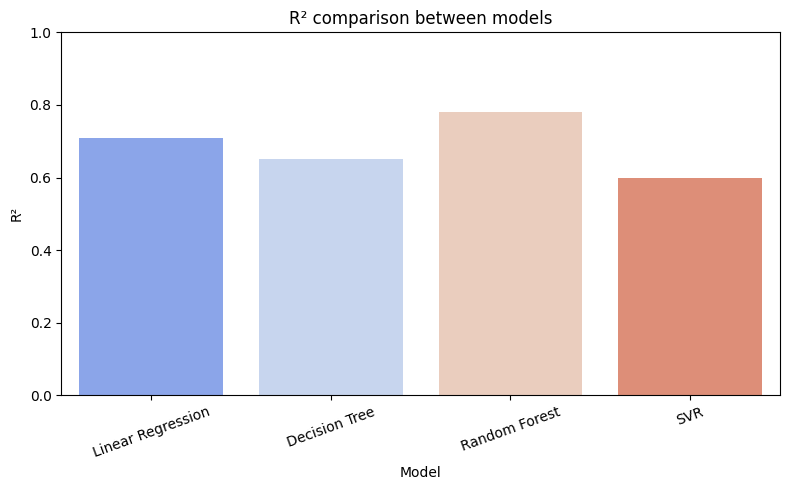

In [11]:
#7th step: making visualizations to communicate results with Seaborn and Matplotlib.
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "SVR"],
    "R2 Score": [0.71, 0.65, 0.78, 0.60],
    "MSE": [23200, 28000, 19800, 31000]
}

results_df = pd.DataFrame(results)

plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Model", y="R2 Score", palette="coolwarm")
plt.title("R² comparison between models")
plt.ylim(0, 1)
plt.ylabel("R²")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

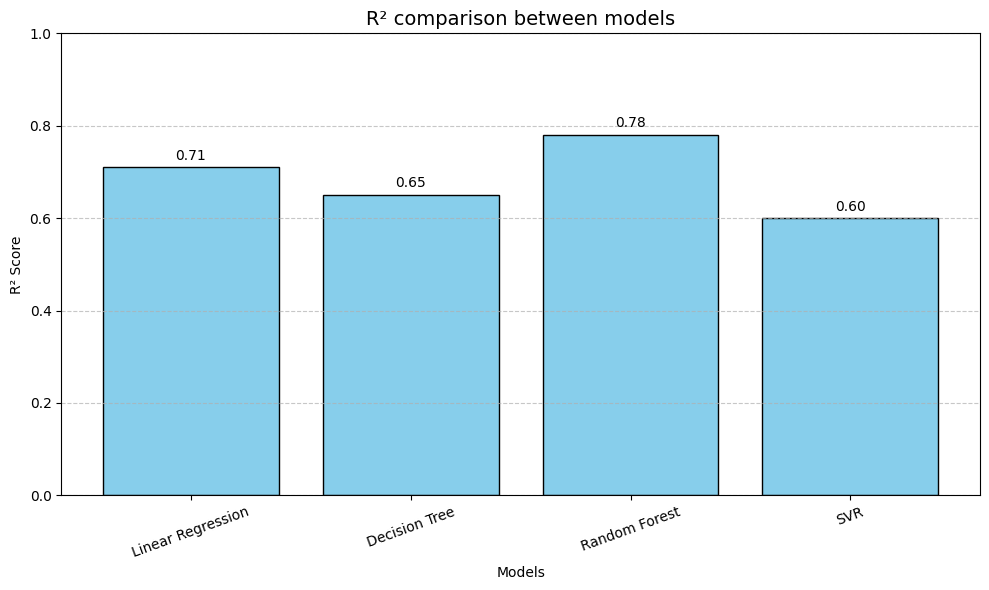

In [12]:
#7th step: making visualizations to communicate results with Seaborn and Matplotlib.

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
r2_scores = [0.71, 0.65, 0.78, 0.60]


plt.figure(figsize=(10,6))
bars = plt.bar(models, r2_scores, color='skyblue', edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)


plt.title('R² comparison between models', fontsize=14)
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()